(150, 4)
🔁 Starting unsupervised SNN training...
Starting training...
Epoch 1/25, Loss: 1.3745
Epoch 2/25, Loss: 0.6091
Epoch 3/25, Loss: 0.4051
Epoch 4/25, Loss: 0.2886
Epoch 5/25, Loss: 0.2178
Epoch 6/25, Loss: 0.2043
Epoch 7/25, Loss: 0.2059
Epoch 8/25, Loss: 0.2007
Epoch 9/25, Loss: 0.1963
Epoch 10/25, Loss: 0.1851
Epoch 11/25, Loss: 0.1799
Epoch 12/25, Loss: 0.1688
Epoch 13/25, Loss: 0.1773
Epoch 14/25, Loss: 0.1745
Epoch 15/25, Loss: 0.1876
Epoch 16/25, Loss: 0.1729
Epoch 17/25, Loss: 0.1724
Epoch 18/25, Loss: 0.1708
Epoch 19/25, Loss: 0.1864
Epoch 20/25, Loss: 0.1725
Epoch 21/25, Loss: 0.1801
Epoch 22/25, Loss: 0.1706
Epoch 23/25, Loss: 0.1848
Epoch 24/25, Loss: 0.1841
Epoch 25/25, Loss: 0.1831
Training completed.
📦 Extracting latent features...
🧠 Training classifier...
Initializing RBF model...
Training data shape: (150, 3)
Training labels shape: (150,)
Training completed. Similarity matrix computed.
✅ Pipeline training complete.
📦 Extracting features for prediction...
Extracte

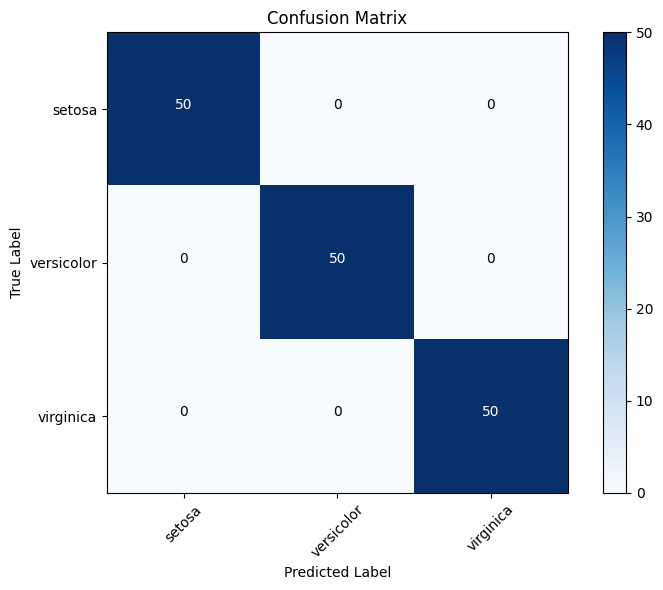


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [3]:
import numpy as np
from snn_autoencoder import SNN_Autoencoder
from rce_model import RCEModel
from rbf_model import RBFModel
from snn_classifier_pipeline import SNN_ClassifierPipeline
from main import load_and_preprocess_data
from utils_model import visualize_latent_space, plot_snn_connections
from utils import plot_confusion_matrix, print_classification_report
# This is a simple example of how to use the SNN_ClassifierPipeline with an SNN autoencoder and RCE or RBF classifier.
# The SNN_ClassifierPipeline is designed to work with any classifier that has fit and predict methods.
# Make sure to install the required libraries:
# pip install brian2 numpy scikit-learn
# Import necessary libraries


# Step 1: Create your dataset
X, y, target_names = load_and_preprocess_data('iris')
print(np.array(X).shape)
# Step 2: Initialize components
snn = SNN_Autoencoder(input_size=4, hidden_size=3, sim_time=100, learning_rate=0.1)
rce = RCEModel(gamma=1.0, learning_rate=0.5)
# OR
rbf = RBFModel(gamma=0.5)

# Step 3: Build pipeline
pipeline = SNN_ClassifierPipeline(snn_model=snn, classifier=rbf)  # or classifier=rbf

# Example:

pipeline.train(X, y, snn_epochs=25)


# Predict
y_pred = pipeline.predict(X)

# Plot confusion matrix
plot_confusion_matrix(y, y_pred, class_names=target_names)

# Print classification report
print_classification_report(y, y_pred)

